In [22]:
import cv2
import os

def resize_image(image_path):
    """Resizes an image to 512x512.

    Args:
        image_path (str): Path to the image file.
        method (str): Resizing image in path.

    Returns:
        numpy.ndarray: The resized image.
    """
    if not os.path.isfile(image_path):
        raise ValueError("Image not found at the specified path.")
    
    image = cv2.imread(image_path)
    
    resized_image = cv2.resize(image, (640, 480), interpolation=cv2.INTER_AREA)  # Use INTER_AREA for better downsampling
    return resized_image


In [25]:
# Example usage
try:
    path_image = """E:/Data science/Data_sc/tc_id_checker/tc_images/person2/tc_ornek_2_front.png"""
    resized_image = resize_image(path_image)
    print(resized_image.shape)
    # save resized_image    
    cv2.imwrite("tc_images/person2/image_resized.png", resized_image)
except ValueError as e:
    print(str(e))

(480, 640, 3)


In [35]:
# read images in folders named person1, person2, etc.. and resize.
base_dir = "E:/Data science/Data_sc/tc_id_checker/tc_images/"
for person_folder in os.listdir(base_dir):
    if person_folder.startswith("person"):
        person_dir = os.path.join(base_dir, person_folder)
        if os.path.isdir(person_dir):
            for image_file in os.listdir(person_dir):
                # read image if image file is named "front.png" and "back.png"
                if image_file.endswith("front.jpg"):
                    image_path = person_dir + "/" + image_file
                    resized_image = resize_image(image_path)
                    print(resized_image.shape)
                    cv2.imwrite(os.path.join(base_dir + "/resized_images/", f"{person_folder}_front.jpg"), resized_image)
                if image_file.endswith("back.jpg"):
                    image_path = os.path.join(person_dir, image_file)
                    resized_image = resize_image(image_path)
                    cv2.imwrite(os.path.join(base_dir + "/resized_images/", f"{person_folder}_back.jpg"), resized_image)


(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


In [ ]:
# Example usage
try:
    path_image = """E:/Data science/Data_sc/tc_id_checker/tc_images/person2/tc_ornek_2_front.png"""
    resized_image = resize_image(path_image)
    print(resized_image.shape)
    # save resized_image    
    cv2.imwrite("tc_images/person2/image_resized.png", resized_image)
except ValueError as e:
    print(str(e))

(480, 640, 3)


## Dataset Midv500

In [3]:
import midv500

In [ ]:

# set directory for dataset to be downloaded
dataset_dir = './midv500_data/'

# download and unzip the base midv500 dataset
dataset_name = "midv500"
midv500.download_dataset(dataset_dir, dataset_name)

In [ ]:
import os

def delete_mp4_mov_files(folder_path):
    """
    Deletes all MP4 and MOV files within a specified folder and its subfolders.

    Args:
        folder_path (str): The path to the folder to be processed.
    """

    for root, directories, files in os.walk(folder_path):
        for filename in files:
            if filename.endswith(".mp4") or filename.endswith(".MOV"):
                file_path = os.path.join(root, filename)
                os.remove(file_path)
                print(f"Deleted file: {file_path}")

# Example usage:
folder_to_process = "midv500_data/midv500/"  # Replace with the actual folder path
delete_mp4_mov_files(folder_to_process)


In [4]:
# set directory for coco annotations to be saved
export_dir = 'Coco_data/'
dataset_dir = './midv500_data/'
# set the desired name of the coco file, coco file will be exported as "filename + '_coco.json'"
filename = 'midv500'

# convert midv500 annotations to coco format
midv500.convert_to_coco(dataset_dir, export_dir, filename)

There are 14748 image files in folder ./midv500_data/.
Converting to coco.


100%|██████████| 14748/14748 [07:35<00:00, 32.36it/s]


In [2]:
import json
f = open('Coco_data/midv500_coco.json')
data = json.load(f)
f.close()

def get_img_ann(image_id):
    img_ann = []
    isFound = False
    for ann in data['annotations']:
        if ann['image_id'] == image_id:
            img_ann.append(ann)
            isFound = True
    if isFound:
        return img_ann
    else:
        return None

def get_img(filename):
  for img in data['images']:
    if img['file_name'] == filename:
      return img

In [2]:
import json
import cv2
import os
import matplotlib.pyplot as plt
import shutil

In [3]:
input_path = "midv500_data/midv500/"
output_path = "yolo_dataset/"

In [ ]:
import os
import shutil
from PIL import Image
file_names = []

def load_images_from_folder(root_folder):
    count = 0
    if count < 3000:
        for root, directories, files in os.walk(root_folder):
            for filename in files:
                if filename.endswith(".tif"):  # Only process TIFF files
                    file_path = os.path.join(root, filename)

                    try:
                        # Check if the TIFF file is empty
                        with Image.open(file_path) as img:
                            
                            width, height = img.size
                            if width == 0 or height == 0:
                                print(f"Warning: Empty TIFF file found: {file_path}")
                            else:
                                destination = f"{output_path}images/img{count}.jpg"
                                #shutil.copy(file_path, destination)
                                img.save(destination, format='PNG')
                                print("File copied successfully.")
                                count += 1
                                file_path = file_path.replace("\\", "/").replace("midv500_data/","")
                                print(file_path)
                                file_names.append(file_path)
                    except shutil.SameFileError:
                        print("Source and destination represent the same file.")
                    except OSError as e:
                        print(f"Error processing file {file_path}: {e}")
                

# Example usage:
root_folder = "midv500_data/midv500/"  # Replace with the actual path
load_images_from_folder(root_folder)


In [5]:
for img in data['images']:
    #print(img['file_name'])
    if img['file_name'] == file_names[1]:
        print(img['file_name'])
        print(img)
    # else:
    #     print("failed")

midv500/01_alb_id/images/CA/CA01_01.tif
{'file_name': 'midv500/01_alb_id/images/CA/CA01_01.tif', 'height': 1920, 'width': 1080, 'id': 0}


In [6]:
data['images'][1]["file_name"]

'midv500/01_alb_id/images/CA/CA01_02.tif'

In [7]:
file_names[1]

'midv500/01_alb_id/images/CA/CA01_01.tif'

In [11]:
print(get_img('midv500/01_alb_id/images/01_alb_id.tif'))

None


In [ ]:
count = 0

for filename in file_names:
  print(filename)
  # Extracting image 
  img = get_img(filename)
  if img is None:
    continue
  img_id = img['id']
  img_w = img['width']
  img_h = img['height']

  # Get Annotations for this image
  img_ann = get_img_ann(img_id)

  if img_ann:
    # Opening file for current image
    file_object = open(f"{output_path}labels/img{count}.txt", "a")

    for ann in img_ann:
      current_category = ann['category_id'] - 1 # As yolo format labels start from 0 
      current_bbox = ann['bbox']
      x = current_bbox[0]
      y = current_bbox[1]
      w = current_bbox[2]
      h = current_bbox[3]
      
      # Finding midpoints
      x_centre = (x + (x+w))/2
      y_centre = (y + (y+h))/2
      
      # Normalization
      x_centre = x_centre / img_w
      y_centre = y_centre / img_h
      w = w / img_w
      h = h / img_h
      
      # Limiting upto fix number of decimal places
      x_centre = format(x_centre, '.6f')
      y_centre = format(y_centre, '.6f')
      w = format(w, '.6f')
      h = format(h, '.6f')
          
      # Writing current object 
      file_object.write(f"{current_category} {x_centre} {y_centre} {w} {h}\n")

    file_object.close()
    count += 1  # This should be outside the if img_ann block.

# Yolo Test

In [ ]:
from ultralytics import YOLO
import torch

torch.cuda.set_device(0)

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8m.pt').to(0)

#result = model.predict("test.png")
# # Train the model using the 'coco128.yaml' dataset for 3 epochs
results = model.train(data='test_cam.jpg',batch=12, epochs=100, imgsz=640, device="cuda")

# # Evaluate the model's performance on the validation set
# results = model.val()

# Export the model to ONNX format
# success = model.export(format='onnx')

In [ ]:
model = YOLO('best.pt').to(0)

result = model.predict("yolo_dataset/images/img1113.jpg")

### Crop from images.

In [21]:
import os
import shutil

def move_and_delete_images(source_folder, destination_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Iterate over files in the source folder
    for filename in os.listdir(source_folder):
        file_path = os.path.join(source_folder, filename)

        # Check if the file is an image (you may want to adjust the list of valid extensions)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            # Construct the destination path
            destination_path = os.path.join(destination_folder, filename)

            # Copy the file to the destination folder
            shutil.copy(file_path, destination_path)

            # Delete the original file
            os.remove(file_path)

            print(f"Moved and deleted: {filename}")

# Example usage


In [98]:
from ultralytics import YOLO
from PIL import Image
import cv2

model = YOLO('best.pt')
results = model.predict(source="tc_images/resized_images/person3_back.jpg")

for r in results:

    r.save_crop(save_dir="Saved_output/", file_name="test")

    source_folder = "Saved_output/id"
    destination_folder = "Saved_output/output_image"

    move_and_delete_images(source_folder, destination_folder)

    # Json of data results
    r_json = r.tojson()
    parsed_data = json.loads(r_json)
    class_of_image=[]
    # Extract and print the 'name' values
    for item in parsed_data:
        name_value = item.get('name')
        if name_value is not None:
            class_of_image.append(name_value)

print(class_of_image)


image 1/1 e:\Data science\Data_sc\tc_id_checker\tc_images\resized_images\person3_back.jpg: 480x640 1 id, 1 front, 137.7ms
Speed: 2.0ms preprocess, 137.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Moved and deleted: test.jpg
['front', 'id']


In [ ]:
print(results)

In [89]:
for r in results:
    print(r.boxes.conf)
    print(r.names)
    print(r.verbose())
    r_json = r.tojson()

tensor([0.8594, 0.8487], device='cuda:0')
{0: 'id', 1: 'front', 2: 'back'}
1 id, 1 back, 


In [95]:
# convert string to list
# Convert the string to a list or dictionary
parsed_data = json.loads(r_json)

class_of_image=[]
# Extract and print the 'name' values
for item in parsed_data:
    name_value = item.get('name')
    if name_value is not None:
        class_of_image.append(name_value)
        print(name_value)

print(class_of_image)

[{'name': 'back', 'class': 2, 'confidence': 0.8594096899032593, 'box': {'x1': 365.4445495605469, 'y1': 80.4691162109375, 'x2': 537.3255004882812, 'y2': 192.79937744140625}}, {'name': 'id', 'class': 0, 'confidence': 0.8486798405647278, 'box': {'x1': 4.695387363433838, 'y1': 0.0, 'x2': 576.2062377929688, 'y2': 368.3673095703125}}]
back
id
['back', 'id']


In [ ]:
import cv2

# Display the image
cv2.imshow("Cropped Image", cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [ ]:
import cv2

# Display the image
cv2.imshow("Cropped Image", cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
type(cropped_image)

NoneType

### Feature extractor.

In [78]:
import cv2

# Load the images
img1 = cv2.imread('Saved_output/id/test6.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('tc_images/resized_images/person2_front.jpg', cv2.IMREAD_GRAYSCALE)

# Create a SIFT feature detector and descriptor extractor
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Create a BFMatcher object for matching descriptors
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Calculate the number of matches
num_matches = len(matches)

# Calculate the percentage of similarity
similarity = num_matches / min(len(keypoints1), len(keypoints2)) * 100

# Print the percentage of similarity
print("Similarity:", similarity, "%")

# Draw the top 20 matches
img3 = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:20], None, flags=2)

# Display the matched image
cv2.imshow('Matches', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()


Similarity: 35.47120418848168 %


In [79]:
import os, sys
import numpy as np
import cv2
import time
from imutils.object_detection import non_max_suppression

def east_detect(image):
    layerNames = [
    	"feature_fusion/Conv_7/Sigmoid",
    	"feature_fusion/concat_3"]
    
    orig = image.copy()
    
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    
    (H, W) = image.shape[:2]
    
    # set the new width and height and then determine the ratio in change
    # for both the width and height: Should be multiple of 32
    (newW, newH) = (320, 320)
    
    rW = W / float(newW)
    rH = H / float(newH)
    
    # resize the image and grab the new image dimensions
    image = cv2.resize(image, (newW, newH))
    
    (H, W) = image.shape[:2]
    
    net = cv2.dnn.readNet("frozen_east_text_detection.pb")
    
    blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
    	(123.68, 116.78, 103.94), swapRB=True, crop=False)
    
    start = time.time()
    
    net.setInput(blob)
    
    (scores, geometry) = net.forward(layerNames)
    
    (numRows, numCols) = scores.shape[2:4]
    rects = []
    confidences = []
    # loop over the number of rows
    for y in range(0, numRows):
        # extract the scores (probabilities), followed by the geometrical
        # data used to derive potential bounding box coordinates that
        # surround text
        scoresData = scores[0, 0, y]
        xData0 = geometry[0, 0, y]
        xData1 = geometry[0, 1, y]
        xData2 = geometry[0, 2, y]
        xData3 = geometry[0, 3, y]
        anglesData = geometry[0, 4, y]
    
        for x in range(0, numCols):
    		# if our score does not have sufficient probability, ignore it
            # Set minimum confidence as required
            if scoresData[x] < 0.5:
                continue
    		# compute the offset factor as our resulting feature maps will
            #  x smaller than the input image
            (offsetX, offsetY) = (x * 4.0, y * 4.0)
            # extract the rotation angle for the prediction and then
            # compute the sin and cosine
            angle = anglesData[x]
            cos = np.cos(angle)
            sin = np.sin(angle)
            # use the geometry volume to derive the width and height of
            # the bounding box
            h = xData0[x] + xData2[x]
            w = xData1[x] + xData3[x]
            # compute both the starting and ending (x, y)-coordinates for
            # the text prediction bounding box
            endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
            endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
            startX = int(endX - w)
            startY = int(endY - h)
            # add the bounding box coordinates and probability score to
            # our respective lists
            rects.append((startX, startY, endX, endY))
            confidences.append(scoresData[x])
                        
    boxes = non_max_suppression(np.array(rects), probs=confidences)
    # loop over the bounding boxes
    for (startX, startY, endX, endY) in boxes:
    	# scale the bounding box coordinates based on the respective
    	# ratios
    	startX = int(startX * rW)
    	startY = int(startY * rH)
    	endX = int(endX * rW)
    	endY = int(endY * rH)
    	# draw the bounding box on the image
    	cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 2)
    
    
    print(time.time() - start)
    return orig

image = cv2.imread("Saved_output/id/test6.jpg")

out_image = east_detect(image)

cv2.imwrite("sample_output.jpg", out_image)



0.426837682723999


True

### Rotation of images

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import rotate
from skimage.transform import (hough_line, hough_line_peaks)
from scipy.stats import mode
from skimage import io
from skimage.filters import threshold_otsu, sobel
from matplotlib import cm
import cv2

def binarizeImage(RGB_image):
  rgb_image = cv2.imread(RGB_image)
  image = rgb2gray(rgb_image)
  threshold = threshold_otsu(image)
  bina_image = image < threshold
  
  return bina_image

def findEdges(bina_image):
  
  image_edges = sobel(bina_image)
  return image_edges


def findTiltAngle(image_edges):
    h, theta, d = hough_line(image_edges)
    accum, angles, dists = hough_line_peaks(h, theta, d)

    if angles.size > 0:
        angle = np.rad2deg(angles[0])  # Use the first angle
    else:
        angle = None  # Handle the case of no lines

    # Only use mode calculation if angles has multiple values
    if angles.size > 1 and angle is None:
        angle = np.rad2deg(mode(angles)[0][0])

    if angle is not None:
        if angle < 0:
            angle = angle + 90
        else:
            angle = angle - 90
    return angle
  
def rotateImage(RGB_image, angle, rotated_image_name="rotated_image.jpg"):
    rgb_image = cv2.imread(RGB_image)
    img_rotated = rotate(rgb_image, angle)
    # Save the rotated image:
    img_rotated= cv2.convertScaleAbs(img_rotated * 255)
    cv2.imwrite(rotated_image_name, img_rotated)

In [91]:
bina= binarizeImage("Saved_output/id/test6.jpg")
edges = findEdges(bina)
angle = findTiltAngle(edges)
rotateImage("Saved_output/id/test6.jpg", angle, "rotat_image.jpg")

print(angle)

-0.9999999999999858


In [88]:
rgb_image = cv2.imread("Saved_output/id/test6.jpg")
img_rotated = rotate(rgb_image, angle)  # Assuming you have a 'rotate' function defined

img_rotated = cv2.convertScaleAbs(img_rotated * 255)
print("--------------")
print(rgb_image.dtype)
print(rgb_image.shape)
print("--------------")
print(img_rotated.dtype)
print(img_rotated.shape)
# Display the original image:
cv2.imshow("Original Image", rgb_image)
cv2.waitKey(0)  # Wait for a key press

# Display the rotated image:
cv2.imshow("Rotated Image", img_rotated)
cv2.waitKey(0)  # Wait for a key press

--------------
uint8
(370, 584, 3)
--------------
uint8
(370, 584, 3)


-1

### Find Rectangle in image

In [69]:
import cv2
import numpy as np

img = cv2.imread('rotated_image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray,100,255,1)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
print("Number of contours detected:", len(contours))

for cnt in contours:
   x1,y1 = cnt[0][0]
   approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
   if len(approx) == 4:
      x, y, w, h = cv2.boundingRect(cnt)
      ratio = float(w)/h
      if ratio >= 0.9 and ratio <= 1.1:
         img = cv2.drawContours(img, [cnt], -1, (0,255,255), 3)
         cv2.putText(img, 'Square', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
      else:
         cv2.putText(img, 'Rectangle', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
         img = cv2.drawContours(img, [cnt], -1, (0,255,0), 3)

cv2.imshow("Shapes", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of contours detected: 154


In [1]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("Saved_output/id/test5.jpg")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 10, 150)  # Adjust thresholds as needed

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter for rectangular contours
rectangles = []
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True)
    if len(approx) == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        if 0.9 <= aspect_ratio <= 1.1:  # Adjust aspect ratio criteria as needed
            rectangles.append(cnt)

# Draw rectangles on the original image
cv2.drawContours(img, rectangles, -1, (0, 255, 0), 2)  # Green rectangles

# Display or save the result
cv2.imshow("Rectangles Detected", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [4]:
# Load the image
import cv2
img = cv2.imread("tc_images/person3/front.jpg")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray.jpg", gray)
cv2.imshow("gray", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


### EASYOCR test

In [8]:
import cv2
import easyocr
def preprocess_image( image_path):
    # Read the image
    original_image = cv2.imread(image_path)

    # Convert the image to grayscale
    #gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Resize the image to 640x480
    resized_image = cv2.resize(original_image, (640, 480))

    return resized_image
image_r = preprocess_image(image_path="id_checker/static/rotated91a13ba5-d4f9-41ba-9dd3-3a82ea2e3e74.jpg")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


([[146, 96], [500, 96], [500, 122], [146, 122]], 'TORKIYE CUMHURIYETI KIMLIk KARTI', 0.5249294500491704)
([[201, 123], [371, 123], [371, 139], [201, 139]], 'Repubuc Ofturkcyide', 0.1837844997934139)
([[407, 123], [447, 123], [447, 139], [407, 139]], 'CARD', 0.412663072347641)
([[96, 174], [220, 174], [220, 200], [96, 200]], '12345678901', 0.7246103770631815)
([[244, 212], [368, 212], [368, 238], [244, 238]], '[KARAÇAMOĞLU', 0.6445247911836792)
([[244, 252], [350, 252], [350, 276], [244, 276]], 'ÖMER SELIM', 0.5175145545657983)
([[249, 279], [273, 279], [273, 291], [249, 291]], 'Doa', 0.1522038322190677)
([[245, 293], [337, 293], [337, 313], [245, 313]], '15.10.1956', 0.7959384472111367)
([[385, 293], [421, 293], [421, 313], [385, 313]], 'EIM', 0.583871115599164)
([[491, 303], [545, 303], [545, 321], [491, 321]], 'U24259', 0.5772348984727045)
([[244, 330], [340, 330], [340, 354], [244, 354]], 'MOOA59153', 0.6426256655956711)
([[385, 331], [457, 331], [457, 351], [385, 351]], 'ICITUR', 0

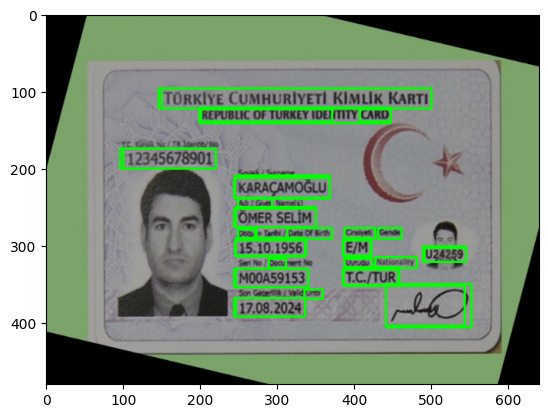

In [23]:
import easyocr
import matplotlib.pyplot as plt
import cv2
reader = easyocr.Reader(['tr','en']) # this needs to run only once to load the model into memory
result = reader.readtext(image_r, detail=10)

t_all = []
for t in result:
    print(t)
    t_all.append(t)
    bbox, text, score = t
    cv2.rectangle(image_r, bbox[0], bbox[2], (0, 255, 0), 2)
    #cv2.putText(image_r, text, (bbox[0][0], bbox[0][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image_r, cv2.COLOR_BGR2RGB))
plt.show()

In [24]:
import easyocr
import cv2
import numpy as np
easyocr_result= result

# Function to calculate the size of a bounding box
def box_size(box):
    return (box[1][0] - box[0][0]) * (box[2][1] - box[1][1])


# Define thresholds for bounding box size and text confidence
min_bounding_box_size = 100 # Adjust as needed
min_text_confidence = 0.45  # Adjust as needed

# Filter the results based on size and confidence
filtered_results = [
    (box, text, confidence) for (box, text, confidence) in easyocr_result
    if box_size(box) >= min_bounding_box_size and confidence >= min_text_confidence
]

# Print the filtered results
for box, text, confidence in filtered_results:
    print(f"Bounding Box: {box}, Text: {text}, Confidence: {confidence}")



Bounding Box: [[146, 96], [500, 96], [500, 122], [146, 122]], Text: TORKIYE CUMHURIYETI KIMLIk KARTI, Confidence: 0.5249294500491704
Bounding Box: [[96, 174], [220, 174], [220, 200], [96, 200]], Text: 12345678901, Confidence: 0.7246103770631815
Bounding Box: [[244, 212], [368, 212], [368, 238], [244, 238]], Text: [KARAÇAMOĞLU, Confidence: 0.6445247911836792
Bounding Box: [[244, 252], [350, 252], [350, 276], [244, 276]], Text: ÖMER SELIM, Confidence: 0.5175145545657983
Bounding Box: [[245, 293], [337, 293], [337, 313], [245, 313]], Text: 15.10.1956, Confidence: 0.7959384472111367
Bounding Box: [[385, 293], [421, 293], [421, 313], [385, 313]], Text: EIM, Confidence: 0.583871115599164
Bounding Box: [[491, 303], [545, 303], [545, 321], [491, 321]], Text: U24259, Confidence: 0.5772348984727045
Bounding Box: [[244, 330], [340, 330], [340, 354], [244, 354]], Text: MOOA59153, Confidence: 0.6426256655956711
Bounding Box: [[385, 331], [457, 331], [457, 351], [385, 351]], Text: ICITUR, Confidence

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_bbox(image_path, bbox_list):
    """
    Plot the image with bounding boxes.
    """
    # Read the image
    img = plt.imread(image_path)

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(img)

    # Plot bounding boxes
    for bbox in bbox_list:
        rect = patches.Polygon(bbox, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    # Show the plot
    plt.show()

def is_same_zone(bbox1, bbox2, coord_threshold=10):

    """
    Check if two bounding boxes are in the same zone.
    """
    cord1 = [bbox1[0], bbox1[3]]
    cord2 = [bbox2[0], bbox2[3]]
    for coordinate1, coordinate2 in zip(cord1, cord2):
        for x1, x2 in zip(coordinate1, coordinate2):
            if abs(x1 - x2) > coord_threshold:
                return False

    return True

akan= [[58, 144], [198, 144], [198, 176], [58, 176]]
zeki= [[45, 135], [201, 135], [201, 171], [45, 171]]

print(is_same_zone(akan, zeki, coord_threshold=25,area_threshold=600))
plot_bbox("tc_images/resized_images/person1_front.jpg", [akan, zeki])

In [28]:
from datetime import datetime
def is_same_zone(bbox1, bbox2, coord_threshold=10, area_threshold=50, x_overlap_threshold=0.5):

    """
    Check if two bounding boxes are in the same zone.
    """
    cord1 = [bbox1[0], bbox1[3]]
    cord2 = [bbox2[0], bbox2[3]]
    for coordinate1, coordinate2 in zip(cord1, cord2):
        for x1, x2 in zip(coordinate1, coordinate2):
            if abs(x1 - x2) > coord_threshold:
                return False

    return True
id_back_boxes = {
    "mother_name": [[[162, 120], [238, 120], [238, 150], [162, 150]] ,str],
    "father_name": [[[164, 176], [272, 176], [272, 206], [164, 206]], str]
}
tc_bounding_boxes = {
    "tc": [[[45, 135], [201, 135], [201, 171], [45, 171]],int],
    "surname": [[[215, 205], [295, 205], [295, 241], [215, 241]],str],
    "name": [[[216, 260], [338, 260], [338, 290], [216, 290]],str],
    "dob": [[[214, 312], [322, 312], [322, 342], [214, 342]],datetime],
    "serie_no": [[[212, 364], [324, 364], [324, 394], [212, 394]],str]
}


def find_matching_text(easyocr_results, bounding_boxes):
    matches = []

    for key, reference_bbox in bounding_boxes.items():
        for result in easyocr_results:
            if is_same_zone(result[0], reference_bbox[0], coord_threshold=55):
                matches.append([key, result[1], result[0], result[2],reference_bbox[1]])
    return matches
match = find_matching_text(filtered_results, tc_bounding_boxes)
print(match)

[['tc', '12345678901', [[96, 174], [220, 174], [220, 200], [96, 200]], 0.7246103770631815, <class 'int'>], ['surname', '[KARAÇAMOĞLU', [[244, 212], [368, 212], [368, 238], [244, 238]], 0.6445247911836792, <class 'str'>], ['surname', 'ÖMER SELIM', [[244, 252], [350, 252], [350, 276], [244, 276]], 0.5175145545657983, <class 'str'>], ['name', '[KARAÇAMOĞLU', [[244, 212], [368, 212], [368, 238], [244, 238]], 0.6445247911836792, <class 'str'>], ['name', 'ÖMER SELIM', [[244, 252], [350, 252], [350, 276], [244, 276]], 0.5175145545657983, <class 'str'>], ['name', '15.10.1956', [[245, 293], [337, 293], [337, 313], [245, 313]], 0.7959384472111367, <class 'str'>], ['dob', '15.10.1956', [[245, 293], [337, 293], [337, 313], [245, 313]], 0.7959384472111367, <class 'datetime.datetime'>], ['dob', 'MOOA59153', [[244, 330], [340, 330], [340, 354], [244, 354]], 0.6426256655956711, <class 'datetime.datetime'>], ['serie_no', 'MOOA59153', [[244, 330], [340, 330], [340, 354], [244, 354]], 0.6426256655956711,

In [13]:
for i in match:
    print(i)

['surname', 'KARAÇAMOĞLU', [[245, 209], [368, 209], [368, 239], [245, 239]], 0.9735783179498693, <class 'str'>]
['name', 'ÖMER SELIM', [[246, 250], [350, 250], [350, 276], [246, 276]], 0.493368828542909, <class 'str'>]
['name', '15.10.1956', [[246, 290], [336, 290], [336, 314], [246, 314]], 0.7906207053544192, <class 'str'>]
['dob', '15.10.1956', [[246, 290], [336, 290], [336, 314], [246, 314]], 0.7906207053544192, <class 'datetime.datetime'>]
['dob', 'MOOA59153', [[246, 330], [340, 330], [340, 354], [246, 354]], 0.5837756307126438, <class 'datetime.datetime'>]
['serie_no', '17.08.2024', [[246, 368], [336, 368], [336, 392], [246, 392]], 0.6029631411126618, <class 'str'>]


In [29]:
from datetime import datetime

def convert_to_type(value):
    if value.isdigit():
        return int(value)
    elif value.replace('.', '', 1).isdigit():  # Check for float with one decimal point
        return float(value)
    else:
        try:
            date_obj = datetime.strptime(value, "%d.%m.%Y")
            return date_obj
        except ValueError:
            return value

# Iterate through the data and update the second element using the convert_to_type function
for item in match:
    item[1] = convert_to_type(item[1])

# Print the updated data

print()
match = [item for item in match if type(item[1]) == item[4]]
print(match)


[['tc', 12345678901, [[96, 174], [220, 174], [220, 200], [96, 200]], 0.7246103770631815, <class 'int'>], ['surname', '[KARAÇAMOĞLU', [[244, 212], [368, 212], [368, 238], [244, 238]], 0.6445247911836792, <class 'str'>], ['surname', 'ÖMER SELIM', [[244, 252], [350, 252], [350, 276], [244, 276]], 0.5175145545657983, <class 'str'>], ['name', '[KARAÇAMOĞLU', [[244, 212], [368, 212], [368, 238], [244, 238]], 0.6445247911836792, <class 'str'>], ['name', 'ÖMER SELIM', [[244, 252], [350, 252], [350, 276], [244, 276]], 0.5175145545657983, <class 'str'>], ['dob', datetime.datetime(1956, 10, 15, 0, 0), [[245, 293], [337, 293], [337, 313], [245, 313]], 0.7959384472111367, <class 'datetime.datetime'>], ['serie_no', 'MOOA59153', [[244, 330], [340, 330], [340, 354], [244, 354]], 0.6426256655956711, <class 'str'>]]


In [15]:
def calculate_distance(bbox1, bbox2):
    """
    Calculate the Euclidean distance between the centers of two bounding boxes.
    """
    x1_center = (bbox1[0][0] + bbox1[1][0]) / 2
    y1_center = (bbox1[0][1] + bbox1[2][1]) / 2
    x2_center = (bbox2[0][0] + bbox2[1][0]) / 2
    y2_center = (bbox2[0][1] + bbox2[2][1]) / 2

    distance = ((x1_center - x2_center) ** 2 + (y1_center - y2_center) ** 2) ** 0.5
    return distance

calculate_distance([[45, 135], [201, 135], [201, 171], [45, 171]],[[215, 205], [295, 205], [295, 241], [215, 241]])

149.41218156495808

In [17]:
data = [['tc', 11299564760, [[56, 120], [202, 120], [202, 152], [56, 152]], 0.991907493707109, int],
        ['surname', 'ŞİMŞEK', [[231, 197], [309, 197], [309, 233], [231, 233]], 0.8412318401147993, str],
        ['surname', 'Adi', [[233, 235], [255, 235], [255, 249], [233, 249]], 0.9018760222773314, str],
        ['name', 'MURAT', [[232, 250], [302, 250], [302, 276], [232, 276]], 0.9993872628499043, str],
        ['serie_no', '03,06.2027', [[230, 398], [334, 398], [334, 424], [230, 424]], 0.8843559319797121, str]]

list_check = ['Adi', 'surname', 'soyadi']  # Assuming 'Adi' should be a string in the list

list_check_lower = [check.lower() for check in list_check]

matching_sublists = []

for sublist in data:
    if len(sublist) >= 2 and isinstance(sublist[1], str):
        sublist_str_lower = sublist[1].lower()
        if any(check in sublist_str_lower for check in list_check_lower):
            matching_sublists.append(sublist)
            print(f"Match found: {sublist[1]} in {list_check}")

# Remove matching sublists from the original data
for sublist in matching_sublists:
    data.remove(sublist)

# Print the modified data
print("Modified Data:")
for sublist in data:
    print(sublist)


Match found: Adi in ['Adi', 'surname', 'soyadi']
Modified Data:
['tc', 11299564760, [[56, 120], [202, 120], [202, 152], [56, 152]], 0.991907493707109, <class 'int'>]
['surname', 'ŞİMŞEK', [[231, 197], [309, 197], [309, 233], [231, 233]], 0.8412318401147993, <class 'str'>]
['name', 'MURAT', [[232, 250], [302, 250], [302, 276], [232, 276]], 0.9993872628499043, <class 'str'>]
['serie_no', '03,06.2027', [[230, 398], [334, 398], [334, 424], [230, 424]], 0.8843559319797121, <class 'str'>]


In [30]:
count_dict = {key: sum(entry[0] == key for entry in match) for key in tc_bounding_boxes}

# Filter keys with occurrences greater than 1
keys_to_process = [key for key, count in count_dict.items() if count > 1]

closer_entries = []
# Apply calculate_distance function to bounding boxes of selected keys
for key in keys_to_process:
    entries = [entry for entry in match if entry[0] == key]
    for i in range(len(entries)):
        bbox1 = entries[i][2]
        bbox_tc = next(entry for entry in match if entry[0] == 'tc')
        distance = calculate_distance(bbox1, bbox_tc[2])
        #print(f"Distance between {key} bounding boxes {i+1} to tc is: {distance}")
        closer_entries.append([key, i+1, distance, entries[i][1],entries[i][3]])


# Create a dictionary to store the entry with the lowest number for each key
lowest_entries = {}

# Iterate through the data and update the lowest_entries dictionary
for entry in closer_entries:
    key = entry[0]
    number = entry[1]
    distance = entry[2]
    value = entry[3]
    accuracy = entry[4]

    if key not in lowest_entries or number < lowest_entries[key][1]:
        lowest_entries[key] = [key, number, distance,value, accuracy]

    if  accuracy > lowest_entries[key][4]:
        lowest_entries[key] = [key, number, distance, value, accuracy]  

# Convert the values of the dictionary to a list
result_list = list(lowest_entries.values())

# Print the result
for entry in result_list:
    print(entry)

['surname', 1, 152.80052355931247, '[KARAÇAMOĞLU', 0.6445247911836792]
['name', 1, 152.80052355931247, '[KARAÇAMOĞLU', 0.6445247911836792]


In [31]:
def process_entries(match, tc_bounding_boxes):
    count_dict = {key: sum(entry[0] == key for entry in match) for key in tc_bounding_boxes}

    # Filter keys with occurrences greater than 1
    keys_to_process = [key for key, count in count_dict.items() if count > 1]

    closer_entries = []
    # Apply calculate_distance function to bounding boxes of selected keys
    for key in keys_to_process:
        entries = [entry for entry in match if entry[0] == key]
        for i in range(len(entries)):
            bbox1 = entries[i][2]
            bbox_tc = next(entry for entry in match if entry[0] == 'tc')
            distance = calculate_distance(bbox1, bbox_tc[2])
            #print(f"Distance between {key} bounding boxes {i+1} to tc is: {distance}")
            closer_entries.append([key, i+1, distance, entries[i][1],entries[i][3]])
            
    # Create a dictionary to store the entry with the lowest number for each key
    lowest_entries = {}

    # Iterate through the data and update the lowest_entries dictionary
    for entry in closer_entries:
        key = entry[0]
        number = entry[1]
        distance = entry[2]
        value = entry[3]
        accuracy = entry[4]

        if key not in lowest_entries or number < lowest_entries[key][1]:
            lowest_entries[key] = [key, number, distance,value, accuracy]

        if key not in lowest_entries or accuracy > lowest_entries[key][4]:
                lowest_entries[key] = [key, number, distance, value, accuracy]  

    # Convert the values of the dictionary to a list
    result_list = list(lowest_entries.values())

    return result_list

# Example usage:
result = process_entries(match, tc_bounding_boxes)
for entry in result:
    print(entry)

['surname', 1, 152.80052355931247, '[KARAÇAMOĞLU', 0.6445247911836792]
['name', 1, 152.80052355931247, '[KARAÇAMOĞLU', 0.6445247911836792]


In [32]:
# Count occurrences of the first element of each key
count_dict = {}
for item in match:
    key = item[0]
    count_dict[key] = count_dict.get(key, 0) + 1

# Create a new list with elements where the first element occurs only once
final_list = [item[0:2] for item in match if count_dict[item[0]] == 1]
print(final_list)
final_list.extend([item[0], item[3]] for item in result_list)

print(final_list)

[['tc', 12345678901], ['dob', datetime.datetime(1956, 10, 15, 0, 0)], ['serie_no', 'MOOA59153']]
[['tc', 12345678901], ['dob', datetime.datetime(1956, 10, 15, 0, 0)], ['serie_no', 'MOOA59153'], ['surname', '[KARAÇAMOĞLU'], ['name', '[KARAÇAMOĞLU']]


In [20]:
# Example result from EasyOCR
easyocr_result = t_all

# Define a threshold for accuracy
accuracy_threshold = 55

# Iterate through all bounding boxes
for box_info in easyocr_result:
    bounding_box, text, accuracy = box_info

    # Check if accuracy is below the threshold
    if accuracy < accuracy_threshold:
        # Extract the coordinates of the bounding box
        box_coordinates = np.array(bounding_box)

        # Read the original image
        original_image = cv2.imread('tc_images/person2/front.jpg')  # Replace with the path to your original image

        # Crop the image using the bounding box coordinates
        cropped_image = original_image[box_coordinates[:, 1].min():box_coordinates[:, 1].max(),
                                        box_coordinates[:, 0].min():box_coordinates[:, 0].max()]

        # Save the cropped image
        cv2.imwrite('cropped_image.jpg', cropped_image)

        pixel_values = processor(images=cropped_image, return_tensors="pt").pixel_values

        generated_ids = model.generate(pixel_values)
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

        # Print the result from the second OCR
        print(f"Second OCR Result for Bounding Box: {generated_text}")

    else:
        # Print the result from the first OCR
        print(f"First OCR Result for Bounding Box: {text}")

NameError: name 'processor' is not defined

In [15]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

# load image from the IAM database (actually this model is meant to be used on printed text)

image = Image.open("rotat_image.jpg").convert("RGB")

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')
pixel_values = processor(images=image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
e:\Data science\Repos\envs\yolo\lib\site-packages\transformers\generation\utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [16]:
generated_text

'2'

### Encryption

In [7]:
from cryptography.fernet import Fernet

def encrypt_image(image_bytes, key):
    cipher_suite = Fernet(key)
    cipher_image_bytes = cipher_suite.encrypt(image_bytes)
    return cipher_image_bytes

def decrypt_image(cipher_image_bytes, key):
    cipher_suite = Fernet(key)
    plain_image_bytes = cipher_suite.decrypt(cipher_image_bytes)
    return plain_image_bytes


def encrypt_text(text, key):
    cipher_suite = Fernet(key)
    cipher_text = cipher_suite.encrypt(text.encode('utf-8'))
    return cipher_text

def decrypt_text(cipher_text, key):
    cipher_suite = Fernet(key)
    plain_text = cipher_suite.decrypt(cipher_text).decode('utf-8')
    return plain_text

# Generate a key for encryption and decryption on the server
def generate_keys():
    server_key = Fernet.generate_key()
    with open('server_key.txt', 'wb') as key_file:
        key_file.write(server_key)


def 

In [5]:
with open('server_key.txt', 'rb') as key_file:
    server_key = key_file.read()
cipher_suite = Fernet(server_key)

In [ ]:
from PIL import Image
import io


with open("1.jpeg", 'rb') as file:
    image_bytes = file.read()
encrypt_text = encrypt_image(image_bytes, server_key)
decrypt_text = decrypt_image(encrypt_text, server_key)
print(encrypt_text)
print()
print(decrypt_text)

# Convert bytes to Image objects
#original_image = Image.open(io.BytesIO(original_image_bytes))
decrypted_image = Image.open(io.BytesIO(decrypt_text))

# Display the images
#original_image.show(title="Original Image")
decrypted_image.show(title="Decrypted Image")

In [15]:
type(encrypt_text)

bytes

In [ ]:
import cv2
image = cv2.imread("1.jpeg")

encrypt_text = encrypt_image(image, server_key)
decrypt_text = decrypt_image(encrypt_text, server_key)
print(encrypt_text)
print(decrypt_text)

TypeError: data must be bytes

In [ ]:
import cv2
image = cv2.imread("1.jpeg")

encrypt_text = encrypt_image(image, server_key)
decrypt_text = decrypt_image(encrypt_text, server_key)
print(encrypt_text)
print(decrypt_text)

TypeError: data must be bytes

hey


### DOCTR

In [114]:
GTK_FOLDER = r'C:\Program Files\GTK3-Runtime Win64\bin'
os.environ['PATH'] = GTK_FOLDER + os.pathsep + os.environ.get('PATH', '')

In [131]:
from doctr.models import ocr_predictor
from doctr.io import DocumentFile

model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)
# Image
single_img_doc = DocumentFile.from_images("tc_images/person2/front.jpg")

In [132]:
result = model(single_img_doc)
json_output = result.export()

### TC Data augmentation

In [205]:
# Function to apply random augmentations to an image
def augment_image(original_image):
    # Specify dimensions of the background image with an additional 50 pixels
    width = original_image.shape[1] + 150
    height = original_image.shape[0] + 150

    # Create a random color with values between 0 and 255
    random_color = np.random.randint(0, 256, size=(3,), dtype=np.uint8)

    # Create a new image with the specified dimensions and fill it with the random color
    background_image = np.full((height, width, 3), random_color, dtype=np.uint8)

    # Calculate the top-left coordinates for placing the original image centered
    top_left_x = (width - original_image.shape[1]) // 2
    top_left_y = (height - original_image.shape[0]) // 2

    # Overlay the original image onto the background
    background_image[top_left_y:top_left_y + original_image.shape[0], top_left_x:top_left_x + original_image.shape[1]] = original_image

    # Randomly rotate the entire image between -15 and 15 degrees
    rotation_angle = np.random.uniform(-15, 15)
    rows, cols, _ = background_image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
    augmented_image = cv2.warpAffine(background_image, rotation_matrix, (cols, rows))

    #Adjust brightness and contrast (optional)
    alpha = np.random.uniform(0.5, 1.5)
    beta = np.random.randint(-25, 25)
    augmented_image = cv2.addWeighted(augmented_image, alpha, augmented_image, 0, beta)

    return augmented_image


# Load images from the folder and subfolders recursively
images = []
root_folder = "tc_images/"
for subdir, dirs, files in os.walk(root_folder):
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(subdir, file)
            img = cv2.imread(image_path)
            if img is not None:  # Check for successful loading
                images.append(img)

# Apply augmentation and save new images and iterate from the image list 4 times
y=0
for y in range(6):
    for i in range(len(images)):
        aug_img = augment_image(images[i])
        cv2.imwrite(f"tc_images/augmented_data/augmented_image_{i+1}{y}.jpg", aug_img)
    y+=1

In [190]:
import cv2
import numpy as np

# Load the image to be added
original_image = cv2.imread("rotat_image.jpg")

# Randomly rotate the image between -15 and 15 degrees
rotation_angle = np.random.uniform(-15, 15)
rows, cols, _ = original_image.shape
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
rotated_image = cv2.warpAffine(original_image, rotation_matrix, (cols, rows))

# Adjust brightness and contrast (optional)
alpha = np.random.uniform(0.5, 1.5)
beta = np.random.randint(-25, 25)
rotated_image = cv2.addWeighted(rotated_image, alpha, rotated_image, 0, beta)

# Specify dimensions of the background image with an additional 50 pixels
width = rotated_image.shape[1] + 50
height = rotated_image.shape[0] + 50

# Create a random color with values between 0 and 255
random_color = np.random.randint(0, 256, size=(3,), dtype=np.uint8)

# Create a new image with the specified dimensions and fill it with the random color
background_image = np.full((height, width, 3), random_color, dtype=np.uint8)

# Calculate the top-left coordinates for placing the rotated image centered
top_left_x = (width - rotated_image.shape[1]) // 2
top_left_y = (height - rotated_image.shape[0]) // 2

# Overlay the rotated image onto the background
background_image[top_left_y:top_left_y + rotated_image.shape[0], top_left_x:top_left_x + rotated_image.shape[1]] = rotated_image

# Save the combined image
cv2.imwrite("combined_image.jpg", background_image)

print("Combined image saved successfully!")


Combined image saved successfully!
